In [ ]:
# load required packages
!pip install pydub

import wave
import math
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import wave
import pandas as pd
import numpy as np
import pydub
from scipy.io.wavfile import read
from pydub import AudioSegment
from pydub.utils import make_chunks
from os import walk
from os import listdir
from os.path import isfile, join
import random
import seaborn as sns
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split,cross_validate,RepeatedStratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score,precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler,normalize,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold,GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy.linalg import eigh
from sklearn.svm import SVC
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from PIL import Image

In [ ]:
# mount google drive to access files and folders
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# load the data
audiopath_df = pd.DataFrame(columns=['file','audio_class'])
cwd = os.getcwd()
folder = ['belly_pain', 'burping','discomfort','hungry','tired']
for t in folder:
  folder_path = cwd+'/gdrive/MyDrive/DS5500/audio/'+t
  audiofile_path = [folder_path+'/'+file for file in os.listdir(folder_path) if file.endswith('.wav')]
  file_df=pd.DataFrame({'file':audiofile_path,
                  'audio_class':t})
  audiopath_df = pd.concat([audiopath_df, file_df],ignore_index=True)

In [ ]:
# extract length of file, age and gender of babies from the files and append to the dataframe

def calculate_audio_length(file_path):
    # load audio file using file path and calculate the length of audio in minutes
    y,sr = librosa.load(file_path)
    length = len(y)/sr
    return length

def extract_gender(file_path):
    # extract information on gender from file name
    g = file_path.split("-")[-3]
    if g == "m":
        return "Male"
    else: return "Female"

def extract_age(file_path):
    # extract information on age in month from file name
    a = int(file_path.split("-")[-2])
    return a

In [ ]:
# extract demographic features
audiopath_df["length"] = audiopath_df["file"].map(lambda x:calculate_audio_length(x))
audiopath_df["gender"] = audiopath_df["file"].map(lambda x:extract_gender(x))
audiopath_df["age_in_months"] = audiopath_df["file"].map(lambda x:extract_age(x))

In [ ]:
#extracting images

output_dir = cwd + '/gdrive/MyDrive/DS5500/'+'images/'
def processing_audio(audio_df = audiopath_df.head(), n_second = 1):
    i = 0
    cry_reason = []
    mel_spec = []
    imagepath = []
    for f in audio_df["file"]:
        print(f)
        y, s = librosa.load(f)
        cry_reason.append(audio_df["audio_class"][i])
        # Start from dividing the sound signal into the form of frames with a duration of 6-seconds
        f1 = y[len(y)-6*s:]

        # Extract Mel-spectogram
        mel = librosa.feature.melspectrogram(y=f1, sr=s)
        log_mel = librosa.power_to_db(mel)

        # Save the spectrogram as an image
        folder_path = os.path.join(output_dir,(audio_df["audio_class"][i]))
        audiofile=(f.split("/")[-1])
        audiofile = audiofile[:-4]
        audiofile = audiofile +'.png'
        image_path = os.path.join(folder_path,audiofile)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(log_mel, sr=s, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.savefig(image_path)
        plt.close()
        mel_spec.append(log_mel)
        imagepath.append(image_path)
        i += 1
    output_df = pd.DataFrame({"cry_reason" : cry_reason,
                              "mel_spec" : mel_spec,
                              "imagepath": imagepath})
    return output_df

In [ ]:
def feature_extraction(file_path_df):
    data_df = processing_audio(audio_df = audiopath_df, n_second = 1)
    return data_df

In [ ]:
### Feature Extraction
data_df= feature_extraction(audiopath_df)

/content/gdrive/MyDrive/DS5500/audio/belly_pain/d6cda191-4962-4308-9a36-46d5648a95ed-1431159272600-1.7-m-04-bp.wav
/content/gdrive/MyDrive/DS5500/audio/belly_pain/69BDA5D6-0276-4462-9BF7-951799563728-1436936185-1.1-m-26-bp.wav
/content/gdrive/MyDrive/DS5500/audio/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav
/content/gdrive/MyDrive/DS5500/audio/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138524-1.0-m-72-bp.wav
/content/gdrive/MyDrive/DS5500/audio/belly_pain/d6cda191-4962-4308-9a36-46d5648a95ed-1431159262344-1.7-m-04-bp.wav
/content/gdrive/MyDrive/DS5500/audio/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138591-1.0-m-72-bp.wav
/content/gdrive/MyDrive/DS5500/audio/belly_pain/549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav
/content/gdrive/MyDrive/DS5500/audio/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138647-1.0-m-72-bp.wav
/content/gdrive/MyDrive/DS5500/audio/belly_pain/C421C6FE-DFEE-4080-8AEA-848E7CE4756B-1430548333

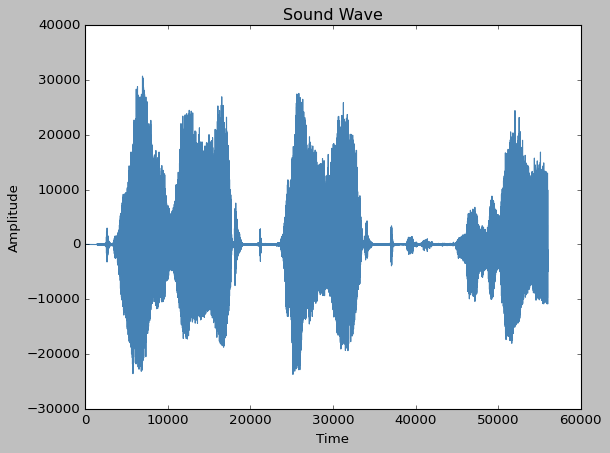

In [ ]:
# visualize one sample audio wave
input_data = read(audiopath_df["file"][49])
audio_sample = input_data[1]
plt.style.use('classic')
plt.plot(audio_sample, color = "steelblue")
plt.title("Sound Wave")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

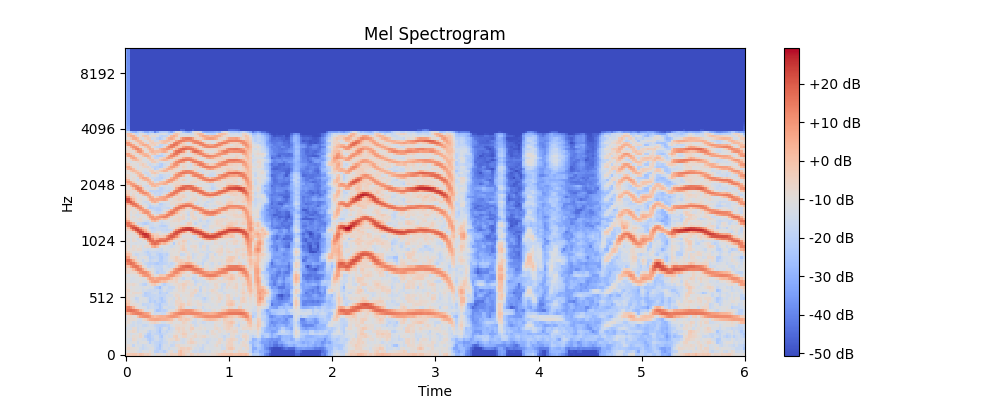

In [ ]:
# sample mel-spectrogram

image1 = data_df['imagepath'][49]
im = Image.open(image1)

im.show()

In [ ]:
# get image arr from imagepath and concat to dataframe
data_df['image_arr'] = None
for idx, row in data_df.iterrows():
  print(idx)
  path = row['imagepath']
  image = Image.open(path).convert('RGB')
  image.thumbnail((256, 256))
  print(image.size)
  img_arr = np.array(image)
  data_df.at[idx,'image_arr'] = img_arr


0
(256, 102)
1
(256, 102)
2
(256, 102)
3
(256, 102)
4
(256, 102)
5
(256, 102)
6
(256, 102)
7
(256, 102)
8
(256, 102)
9
(256, 102)
10
(256, 102)
11
(256, 102)
12
(256, 102)
13
(256, 102)
14
(256, 102)
15
(256, 102)
16
(256, 102)
17
(256, 102)
18
(256, 102)
19
(256, 102)
20
(256, 102)
21
(256, 102)
22
(256, 102)
23
(256, 102)
24
(256, 102)
25
(256, 102)
26
(256, 102)
27
(256, 102)
28
(256, 102)
29
(256, 102)
30
(256, 102)
31
(256, 102)
32
(256, 102)
33
(256, 102)
34
(256, 102)
35
(256, 102)
36
(256, 102)
37
(256, 102)
38
(256, 102)
39
(256, 102)
40
(256, 102)
41
(256, 102)
42
(256, 102)
43
(256, 102)
44
(256, 102)
45
(256, 102)
46
(256, 102)
47
(256, 102)
48
(256, 102)
49
(256, 102)
50
(256, 102)
51
(256, 102)
52
(256, 102)
53
(256, 102)
54
(256, 102)
55
(256, 102)
56
(256, 102)
57
(256, 102)
58
(256, 102)
59
(256, 102)
60
(256, 102)
61
(256, 102)
62
(256, 102)
63
(256, 102)
64
(256, 102)
65
(256, 102)
66
(256, 102)
67
(256, 102)
68
(256, 102)
69
(256, 102)
70
(256, 102)
71
(256, 102)
72

In [ ]:
data_df['image_arr'][0].shape

(102, 256, 3)

In [ ]:
# model architecture

from keras.engine.base_layer import regularizers
def cnn_structure(x_train,x_test,num_labels=5):
  #parametrs for input into the model
  num_rows = 102 #corresponds to height of an image
  num_columns = 256 #corresponds to width of an image
  num_channels = 3 #channels in an image, 1 suggests its a grayscale image

  #reshape our input data to match the

  #x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
  #x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

  print('xtrain shape',x_train.shape)
  # Construct model
  model = Sequential()

  # Add convolution layers
  #model.add(Conv2D(32,(3,3), input_shape=(num_rows, num_columns, num_channels), activation='relu', kernel_regularizer= regularizers.l2(0.01)))
  model.add(Conv2D(32,(3,3), input_shape=(num_rows, num_columns, num_channels), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))

  #model.add(Conv2D(64,(3,3), activation='relu',kernel_regularizer= regularizers.l2(0.01)))
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))

  #model.add(Conv2D(128,(3,3), activation='relu',kernel_regularizer= regularizers.l2(0.01)))
  model.add(Conv2D(128,(3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))

  # output feature map to flattened vector
  model.add(Flatten())

  # Add fully connected layers
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(5, activation='softmax'))

  return model

In [ ]:
#Train the model
def cnn_model(x_train,x_test,y_train, y_test, x_val, y_val):

  print('in model')
  #convert the mfcc and label columns to arrays
  X_train = np.array(x_train.tolist())
  y_train = np.array(y_train.tolist())
  X_test = np.array(x_test.tolist())
  y_test = np.array(y_test.tolist())
  X_val = np.array(x_val.tolist())
  y_val = np.array(y_val.tolist())

  print(X_train.shape)

  # label encoding
  le = LabelEncoder()
  y_train = to_categorical(le.fit_transform(y_train))
  y_test = to_categorical(le.transform(y_test))
  y_val = to_categorical(le.transform(y_val))
  print('le done')

  #build model architecture
  model = cnn_structure(X_train,X_test,5)

  model.summary()

  print('starting compile')
  # Compile the model
  model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])

  num_epochs = 100
  num_batch_size = 128

  # save the best training weights
  model_callback_checkpoint = ModelCheckpoint(filepath='cnn_model/bestmodel.h5',save_best_only=True, monitor='val_loss')
  history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[model_callback_checkpoint])

  # load the saved model
  new_model = load_model('cnn_model/bestmodel.h5')

  # get model predictions on test data
  predictions = new_model.predict(X_test)

  # since the have our predictions in binary matrix we get the index of the highest prob value
  y_pred = np.argmax(predictions, axis = 1)

  # we apply inverse of label encoder to get the corresponding lables of the numeric values
  y_pred_labels = le.inverse_transform(y_pred)

  return history, y_pred_labels

In [ ]:
def report_performance(y_test,y_pred):
    # calculate precision, recall, and f1 based on the cry reason of orginal audio and predictions
    precision_1, recall_1,f1_1, null_value_1 = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)

    precision_2, recall_2,f1_2, null_value_2 = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)
    # calucate accuracy rate
    accuracy = accuracy_score(y_test,y_pred)
    return {
        'precision_macro': precision_1,
        'recall_macro': recall_1,
        'f1_macro': f1_1,
        'precision_weighted': precision_2,
        'recall_weighted': recall_2,
        'f1_weighted': f1_2,
        'accuracy': accuracy
    }

In [ ]:
# prep the data for input
y = data_df['cry_reason']
X = data_df['image_arr']

print(X.shape)
print(y.shape)

(457,)
(457,)


In [ ]:
# train-test-val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

in model
(292, 102, 256, 3)
le done
xtrain shape (292, 102, 256, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 127, 32)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 127, 32)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 125, 64)       18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 62, 64)       0         
 g2D)                                                            
                                                    

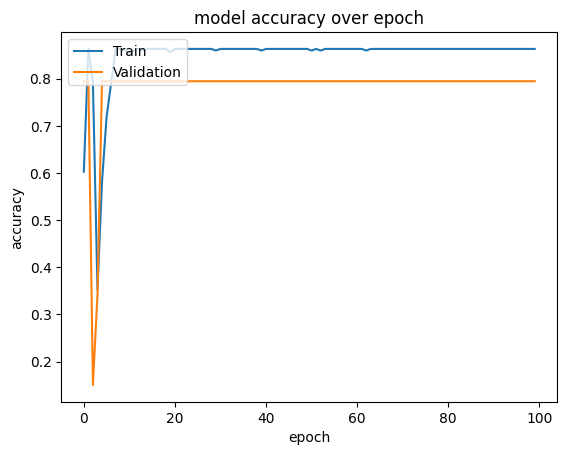

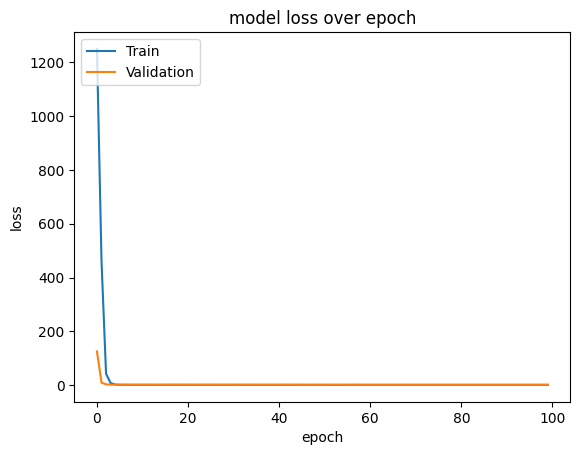

,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted,accuracy
0,0.156522,0.2,0.17561,0.612476,0.782609,0.687169,0.782609


In [ ]:
# execute the model and get predictions

history, y_pred = cnn_model(X_train, X_test, y_train, y_test, X_val, y_val)

# summarize training and val accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy over epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize training and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# calculate performance metrics
metrics_dict = report_performance(y_test,y_pred)
metrics_df = pd.Series(metrics_dict).to_frame().T

metrics_df

## **PHASE 2**

In [ ]:
# load train and test images for phase 2
train_df = pd.DataFrame(columns=['filepath','audio_class','img_arr'])
test_df = pd.DataFrame(columns=['filepath','audio_class','img_arr'])

cwd = os.getcwd()
print(cwd)

folder = ['image_train', 'image_test']
for t in folder:
  folder_path = cwd+'/gdrive/MyDrive/'+t
  audiofile_path = [folder_path+'/'+file for file in os.listdir(folder_path)]
  audio_class = [file.split(",")[-2] for file in os.listdir(folder_path)]
  file_df=pd.DataFrame({'filepath':audiofile_path,
                        'audio_class':audio_class})
  if t == 'image_train':
    train_df = pd.concat([train_df, file_df],ignore_index=True)
  else:
    test_df = pd.concat([test_df, file_df],ignore_index=True)

/content


In [ ]:
print(train_df.shape)
print(test_df.shape)

(383, 3)
(126, 3)


In [ ]:
train_df

,filepath,audio_class,img_arr
0,/content/gdrive/MyDrive/image_train/belly_pain...,belly_pain,NaN
1,"/content/gdrive/MyDrive/image_train/burping,au...",burping,NaN
2,/content/gdrive/MyDrive/image_train/belly_pain...,belly_pain,NaN
3,/content/gdrive/MyDrive/image_train/belly_pain...,belly_pain,NaN
4,"/content/gdrive/MyDrive/image_train/burping,au...",burping,NaN
...,...,...,...
378,"/content/gdrive/MyDrive/image_train/tired,audi...",tired,NaN
379,"/content/gdrive/MyDrive/image_train/tired,audi...",tired,NaN
380,"/content/gdrive/MyDrive/image_train/tired,audi...",tired,NaN
381,"/content/gdrive/MyDrive/image_train/tired,audi...",tired,NaN


In [ ]:
train_df['audio_class'].value_counts()

hungry        283
tired          32
discomfort     30
belly_pain     22
burping        16
Name: audio_class, dtype: int64

In [ ]:
# get image arr from imagepath and concat to dataframe
for idx, row in train_df.iterrows():
  print(idx)
  path = row['filepath']
  image = Image.open(path).convert('RGB')
  image.thumbnail((256, 256))
  img_arr = np.array(image)
  train_df.at[idx,'img_arr'] = img_arr

train_df

NameError: ignored

In [ ]:
train_df['img_arr'][3].shape

(98, 256, 3)

In [ ]:
# get image arr from imagepath and concat to dataframe
for idx, row in test_df.iterrows():
  print(idx)
  path = row['filepath']
  image = Image.open(path).convert('RGB')
  image.thumbnail((256, 256))
  img_arr = np.array(image)
  test_df.at[idx,'img_arr'] = img_arr

test_df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


,filepath,audio_class,img_arr
0,"/content/gdrive/MyDrive/image_test/burping,aud...",burping,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,"/content/gdrive/MyDrive/image_test/belly_pain,...",belly_pain,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,"/content/gdrive/MyDrive/image_test/burping,aud...",burping,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,"/content/gdrive/MyDrive/image_test/belly_pain,...",belly_pain,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,"/content/gdrive/MyDrive/image_test/belly_pain,...",belly_pain,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...
121,"/content/gdrive/MyDrive/image_test/tired,audio...",tired,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
122,"/content/gdrive/MyDrive/image_test/tired,audio...",tired,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
123,"/content/gdrive/MyDrive/image_test/tired,audio...",tired,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
124,"/content/gdrive/MyDrive/image_test/tired,audio...",tired,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [ ]:
# model architecture

from keras.engine.base_layer import regularizers
def cnn_structure(x_train,x_test,num_labels=5):
  #parametrs for input into the model
  num_rows = 98 #corresponds to height of an image
  num_columns = 256 #corresponds to width of an image
  num_channels = 3 #channels in an image, 1 suggests its a grayscale image

  #reshape our input data to match the

  #x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
  #x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

  print('xtrain shape',x_train.shape)
  # Construct model
  model = Sequential()

  # Add convolution layers
  #model.add(Conv2D(32,(3,3), input_shape=(num_rows, num_columns, num_channels), activation='relu', kernel_regularizer= regularizers.l2(0.01)))
  model.add(Conv2D(32,(3,3), input_shape=(num_rows, num_columns, num_channels), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))

  #model.add(Conv2D(64,(3,3), activation='relu',kernel_regularizer= regularizers.l2(0.01)))
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))

  #model.add(Conv2D(128,(3,3), activation='relu',kernel_regularizer= regularizers.l2(0.01)))
  model.add(Conv2D(128,(3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))

  # output feature map to flattened vector
  model.add(Flatten())

  # Add fully connected layers
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(5, activation='softmax'))

  return model

In [ ]:
#Train the model
def cnn_model(x_train,x_test,y_train, y_test, x_val, y_val):

  print('in model')
  #convert the mfcc and label columns to arrays
  X_train = np.array(x_train.tolist())
  y_train = np.array(y_train.tolist())
  X_test = np.array(x_test.tolist())
  y_test = np.array(y_test.tolist())
  X_val = np.array(x_val.tolist())
  y_val = np.array(y_val.tolist())

  print("train shape in cnn model",X_train.shape)

  # label encoding
  le = LabelEncoder()
  y_train = to_categorical(le.fit_transform(y_train))
  y_test = to_categorical(le.transform(y_test))
  y_val = to_categorical(le.transform(y_val))
  print('le done')

  #build model architecture
  model = cnn_structure(X_train,X_test,5)

  model.summary()

  print('starting compile')
  # Compile the model
  model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])

  num_epochs = 100
  num_batch_size = 128

  # save the best training weights
  model_callback_checkpoint = ModelCheckpoint(filepath='cnn_model/bestmodel.h5',save_best_only=True, monitor='val_loss')
  history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[model_callback_checkpoint])

  # load the saved model
  new_model = load_model('cnn_model/bestmodel.h5')

  # get model predictions on test data
  predictions = new_model.predict(X_test)

  # since the have our predictions in binary matrix we get the index of the highest prob value
  y_pred = np.argmax(predictions, axis = 1)

  # we apply inverse of label encoder to get the corresponding lables of the numeric values
  y_pred_labels = le.inverse_transform(y_pred)

  return history, y_pred_labels

In [ ]:
def report_performance(y_test,y_pred):
    # calculate precision, recall, and f1 based on the cry reason of orginal audio and predictions
    precision_1, recall_1,f1_1, null_value_1 = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)

    precision_2, recall_2,f1_2, null_value_2 = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)
    # calucate accuracy rate
    accuracy = accuracy_score(y_test,y_pred)
    return {
        'precision_macro': precision_1,
        'recall_macro': recall_1,
        'f1_macro': f1_1,
        'precision_weighted': precision_2,
        'recall_weighted': recall_2,
        'f1_weighted': f1_2,
        'accuracy': accuracy
    }

In [ ]:
print(train_df.shape)
print(test_df.shape)

(383, 3)
(126, 3)


In [ ]:
# prep the data for input
y_train = train_df['audio_class']
y_test = test_df['audio_class']
X_test = test_df.copy()

# train-test-val split
X_train, X_val, y_train, y_val = train_test_split(train_df, y_train, test_size=0.20, random_state=42, stratify=y_train)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(306, 3)
(77, 3)
(126, 3)
(306,)
(77,)
(126,)


in model
train shape in cnn model (306, 98, 256, 3)
le done
xtrain shape (306, 98, 256, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 254, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 127, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 127, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 62, 64)       0         
 2D)                                                             
                               

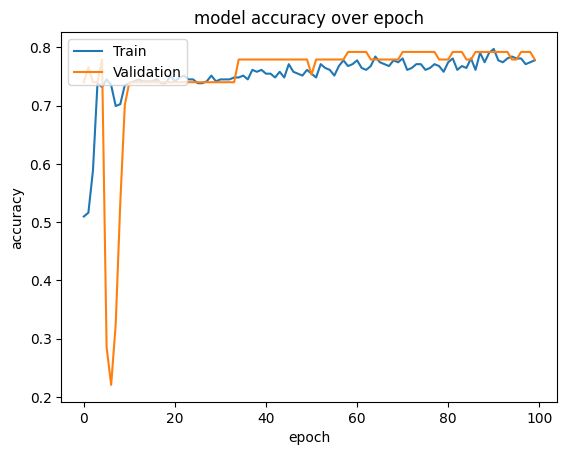

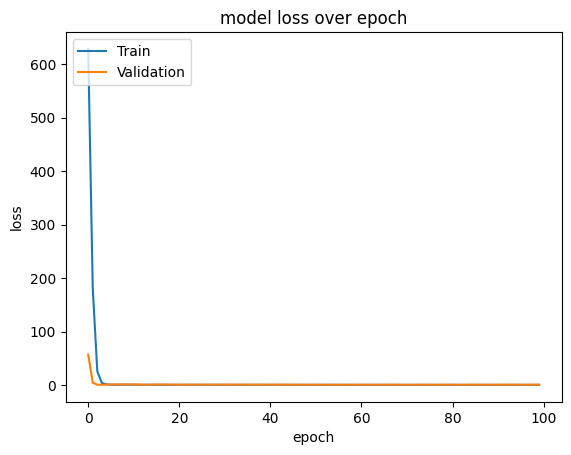

,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted,accuracy
0,0.150794,0.2,0.171946,0.568468,0.753968,0.648208,0.753968


In [ ]:
# execute the model and get predictions

history, y_pred = cnn_model(X_train['img_arr'], X_test['img_arr'], y_train, y_test, X_val['img_arr'], y_val)

# summarize training and val accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy over epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize training and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# calculate performance metrics
metrics_dict = report_performance(y_test,y_pred)
metrics_df = pd.Series(metrics_dict).to_frame().T

metrics_df

## **Binary Classification**

In [ ]:
# add a new column for binary class
train_df['binary_class'] = train_df['audio_class'].replace({'belly_pain': 'not_hungry', 'burping': 'not_hungry', 'discomfort': 'not_hungry', 'tired': 'not_hungry'})
test_df['binary_class'] = test_df['audio_class'].replace({'belly_pain': 'not_hungry', 'burping': 'not_hungry', 'discomfort': 'not_hungry', 'tired': 'not_hungry'})

print(train_df['audio_class'].value_counts())
print(train_df['binary_class'].value_counts())
print(test_df['audio_class'].value_counts())
print(test_df['binary_class'].value_counts())

hungry        283
tired          32
discomfort     30
belly_pain     22
burping        16
Name: audio_class, dtype: int64
hungry        283
not_hungry    100
Name: binary_class, dtype: int64
hungry        95
tired         11
discomfort     8
belly_pain     7
burping        5
Name: audio_class, dtype: int64
hungry        95
not_hungry    31
Name: binary_class, dtype: int64


In [ ]:
# prep the data for input
y_train = train_df['binary_class']
y_test = test_df['binary_class']
X_test = test_df.copy()

# train-test-val split
X_train, X_val, y_train, y_val = train_test_split(train_df, y_train, test_size=0.20, random_state=42, stratify=y_train)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(306, 4)
(77, 4)
(126, 4)
(306,)
(77,)
(126,)


In [ ]:
y_train.value_counts()

hungry        226
not_hungry     80
Name: binary_class, dtype: int64

In [ ]:
# model architecture

from keras.engine.base_layer import regularizers
def cnn_structure(x_train,x_test,num_labels=5):
  #parametrs for input into the model
  num_rows = 98 #corresponds to height of an image
  num_columns = 256 #corresponds to width of an image
  num_channels = 3 #channels in an image, 1 suggests its a grayscale image

  #reshape our input data to match the

  #x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
  #x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

  print('xtrain shape',x_train.shape)
  # Construct model
  model = Sequential()

  # Add convolution layers
  #model.add(Conv2D(32,(3,3), input_shape=(num_rows, num_columns, num_channels), activation='relu', kernel_regularizer= regularizers.l2(0.01)))
  model.add(Conv2D(32,(3,3), input_shape=(num_rows, num_columns, num_channels), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))

  #model.add(Conv2D(64,(3,3), activation='relu',kernel_regularizer= regularizers.l2(0.01)))
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))

  #model.add(Conv2D(128,(3,3), activation='relu',kernel_regularizer= regularizers.l2(0.01)))
  model.add(Conv2D(128,(3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.4))

  # output feature map to flattened vector
  model.add(Flatten())

  # Add fully connected layers
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation='softmax'))

  return model

in model
train shape in cnn model (306, 98, 256, 3)
le done
xtrain shape (306, 98, 256, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 254, 32)       896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 127, 32)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 48, 127, 32)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 125, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 62, 64)       0         
 2D)                                                             
                             

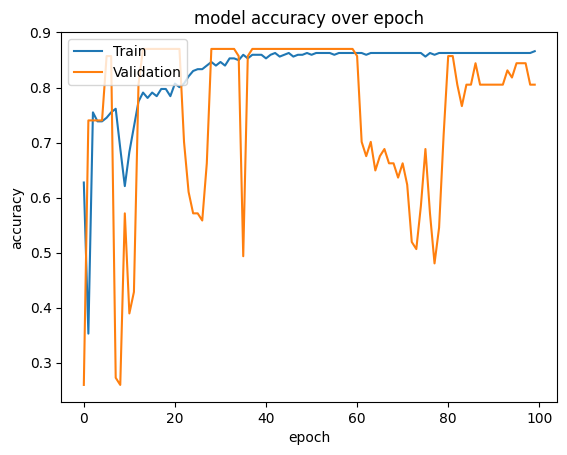

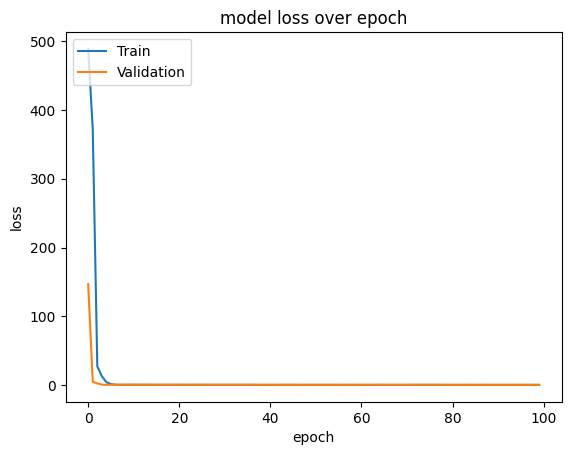

,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted,accuracy
0,0.88,0.516129,0.463068,0.819048,0.761905,0.666531,0.761905


In [ ]:
# execute the model and get predictions

history, y_pred = cnn_model(X_train['img_arr'], X_test['img_arr'], y_train, y_test, X_val['img_arr'], y_val)

# summarize training and val accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy over epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize training and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss over epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# calculate performance metrics
metrics_dict = report_performance(y_test,y_pred)
metrics_df = pd.Series(metrics_dict).to_frame().T

metrics_df